In [220]:
import pandas as pd 
import numpy as np
import os


In [221]:
path = "C:/Users/Sylvanus/Documents/Project/data"

os.chdir(path)


In [222]:
file = pd.read_csv("./CORR-DATA_Database.csv")

file.head()

,Environment,Material Group,Material Family,Material,Rate (mm/yr) or Rating,Rate (mils/yr) or Rating,Localized Attack,UNS,Condition/Comment,Concentration (Vol %),Temperature (deg C),Temperature (deg F),Duration,Reference #,Reference
0,Acetaldehyde,Miscellaneous,Magnesium and alloys,Magnesium,D (Poor),D (Poor),NaN,NaN,NaN,All,NaN,NaN,NaN,119.0,"Dow Chemical Co., Midland, MI"
1,Acetaldehyde,Miscellaneous,Noble metals,Platinum,0.05 max,2 max,NaN,P04995,NaN,Pure,200-400,390-750,NaN,6.0,"Metals Handbook, Ninth Edition, Vol 13, Corros..."
2,Acetaldehyde,Miscellaneous,Noble metals,Silver,0.05 max,2 max,NaN,P07010,NaN,Pure,200-400,390-750,NaN,10.0,"Metals Handbook, Ninth Edition, Vol 13, Corros..."
3,Acetaldehyde,Refractory metals and alloys,Titanium and alloys,Titanium,0.001,0.04,NaN,NaN,NaN,75,149,300,NaN,90.0,"N.D. Tomashov and P.M. Altovskii, Corrosion an..."
4,Acetaldehyde,Refractory metals and alloys,Titanium and alloys,Titanium,A (Resistant),A (Resistant),NaN,NaN,NaN,100,149,300,NaN,90.0,"N.D. Tomashov and P.M. Altovskii, Corrosion an..."


In [223]:
data = pd.read_excel("./data.xlsx")

In [224]:
os.listdir()

['about-CORR-DATA_Database.txt',
 'columnDefinitions.txt',
 'CORR-DATA_Database.csv',
 'data.xlsx',
 'diif.ipynb',
 'index.html',
 'project.ipynb',
 '~$data.xlsx']

In [225]:
os.open("./diif.ipynb", 0)

6

In [226]:
f = pd.read_html("./index.html")

In [227]:
file.head()

,Environment,Material Group,Material Family,Material,Rate (mm/yr) or Rating,Rate (mils/yr) or Rating,Localized Attack,UNS,Condition/Comment,Concentration (Vol %),Temperature (deg C),Temperature (deg F),Duration,Reference #,Reference
0,Acetaldehyde,Miscellaneous,Magnesium and alloys,Magnesium,D (Poor),D (Poor),NaN,NaN,NaN,All,NaN,NaN,NaN,119.0,"Dow Chemical Co., Midland, MI"
1,Acetaldehyde,Miscellaneous,Noble metals,Platinum,0.05 max,2 max,NaN,P04995,NaN,Pure,200-400,390-750,NaN,6.0,"Metals Handbook, Ninth Edition, Vol 13, Corros..."
2,Acetaldehyde,Miscellaneous,Noble metals,Silver,0.05 max,2 max,NaN,P07010,NaN,Pure,200-400,390-750,NaN,10.0,"Metals Handbook, Ninth Edition, Vol 13, Corros..."
3,Acetaldehyde,Refractory metals and alloys,Titanium and alloys,Titanium,0.001,0.04,NaN,NaN,NaN,75,149,300,NaN,90.0,"N.D. Tomashov and P.M. Altovskii, Corrosion an..."
4,Acetaldehyde,Refractory metals and alloys,Titanium and alloys,Titanium,A (Resistant),A (Resistant),NaN,NaN,NaN,100,149,300,NaN,90.0,"N.D. Tomashov and P.M. Altovskii, Corrosion an..."


<Axes: >

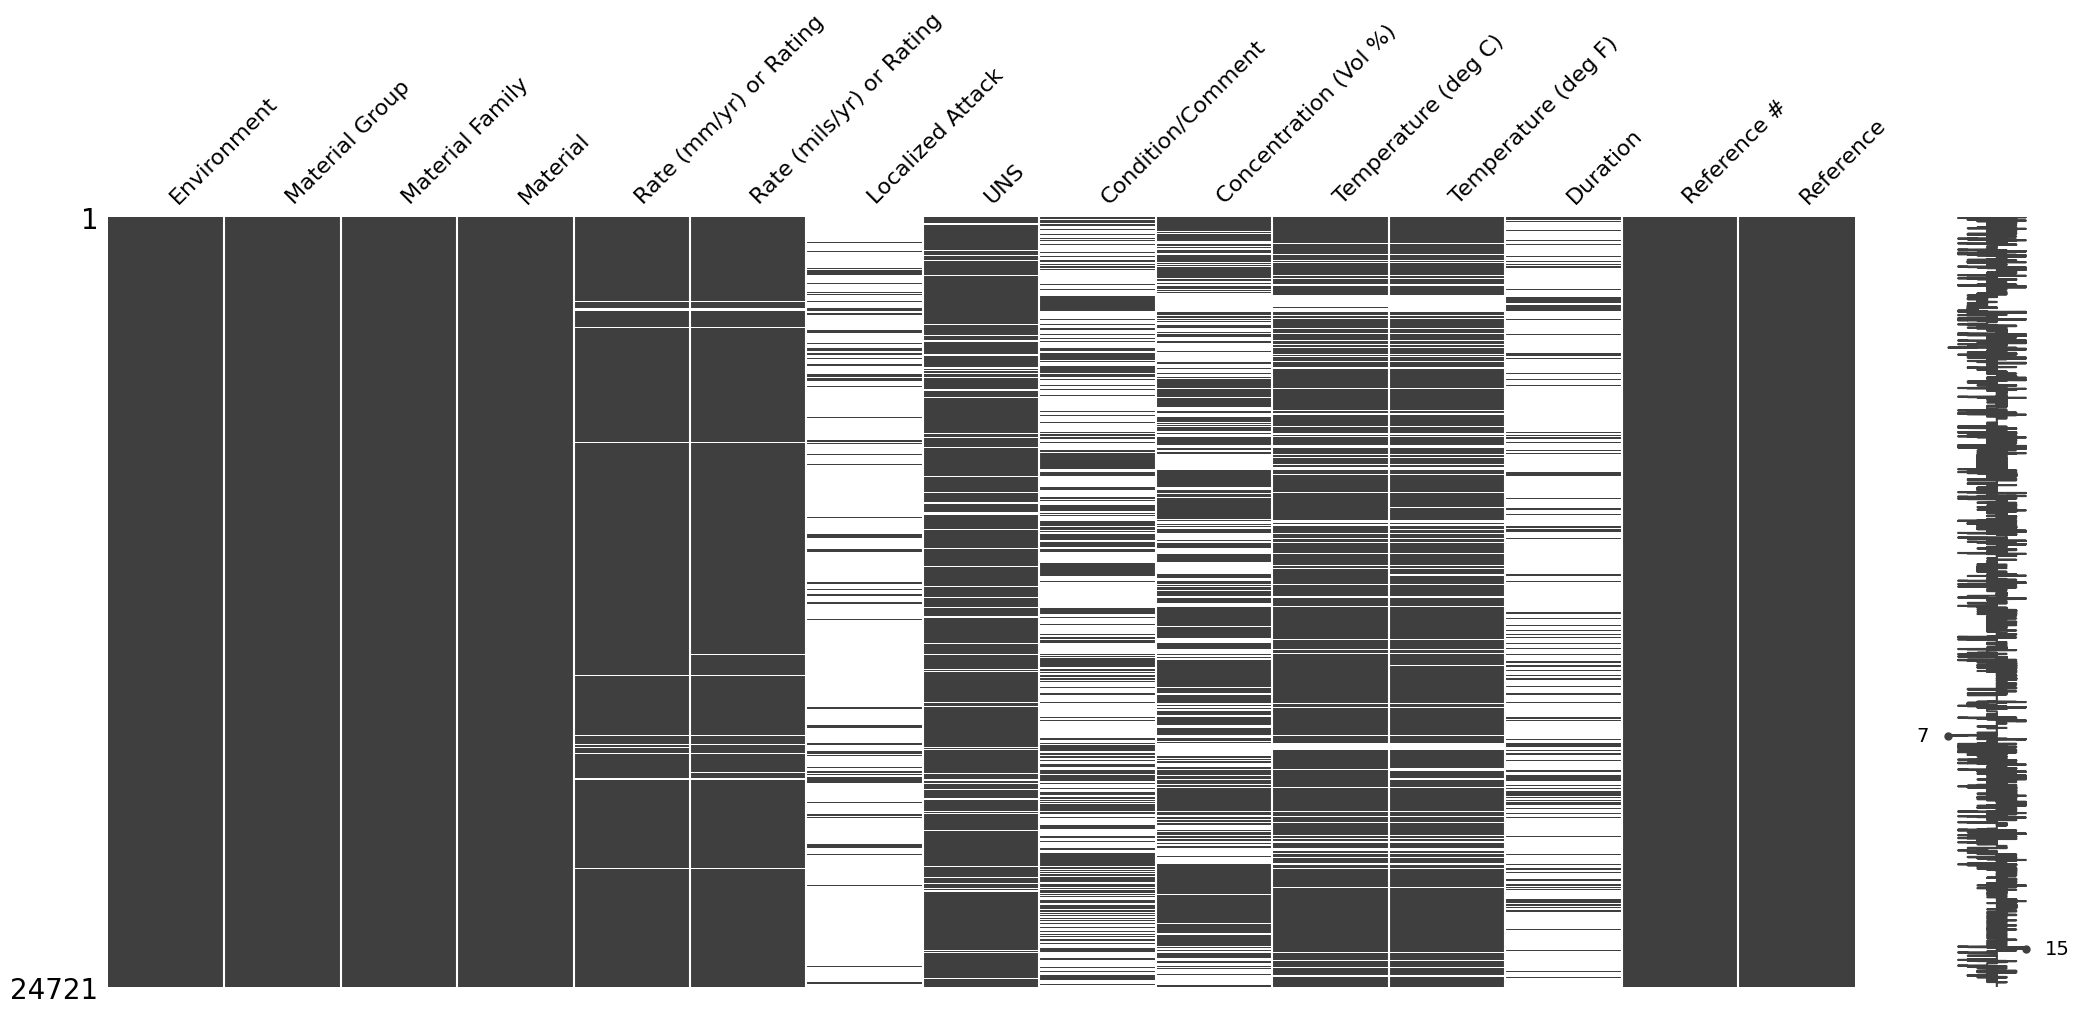

In [228]:
import missingno as msn

msn.matrix(file)

<Axes: >

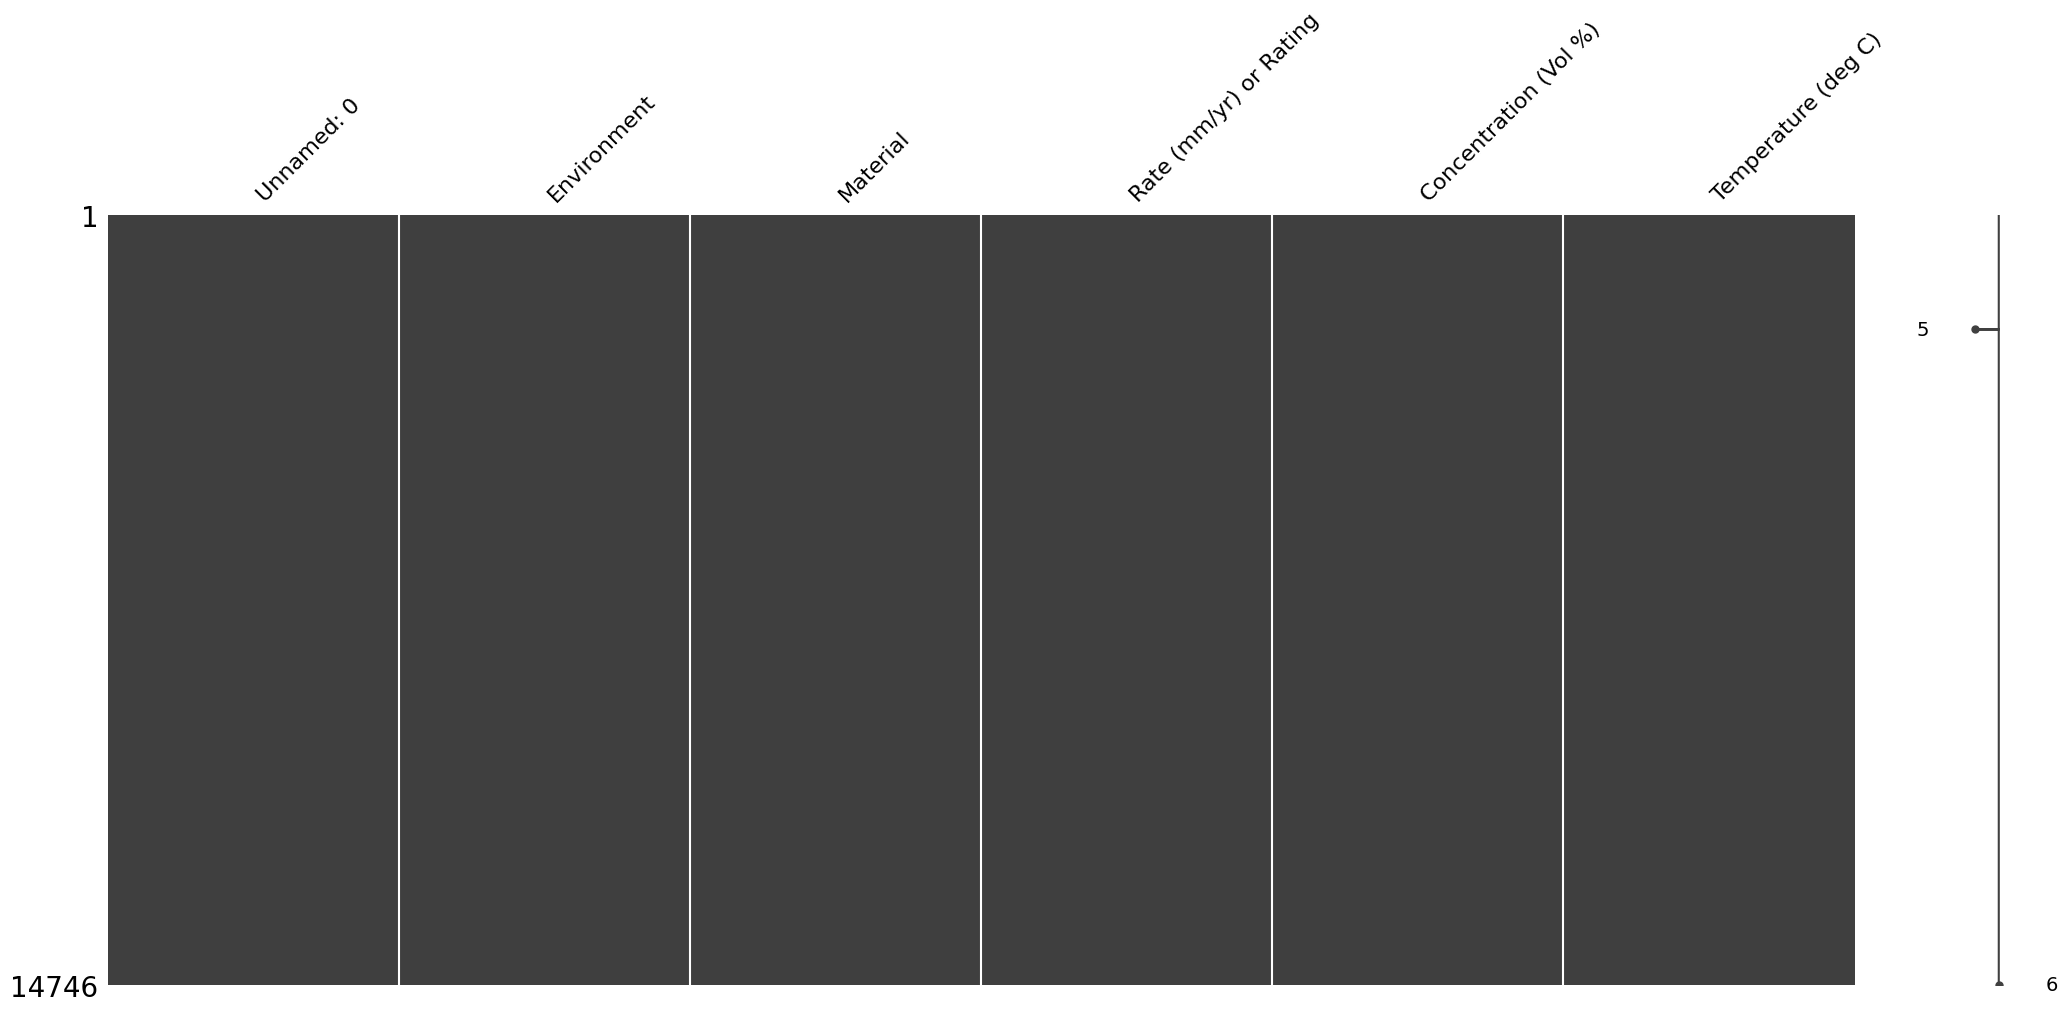

In [229]:
msn.matrix(data)

In [230]:
def empty(series, threshold):
    num = series.isna().sum()
    total = series.shape[0]
    percent = num/total
    return f"{round(percent, 3):%}" if percent > threshold else None


In [231]:
features_names = file.apply(lambda x: empty(x, 0.15), axis=0)

features_names.dropna(inplace=True)
features_names = features_names.keys()

In [232]:
file.drop(features_names, axis=1, inplace=True)



<Axes: >

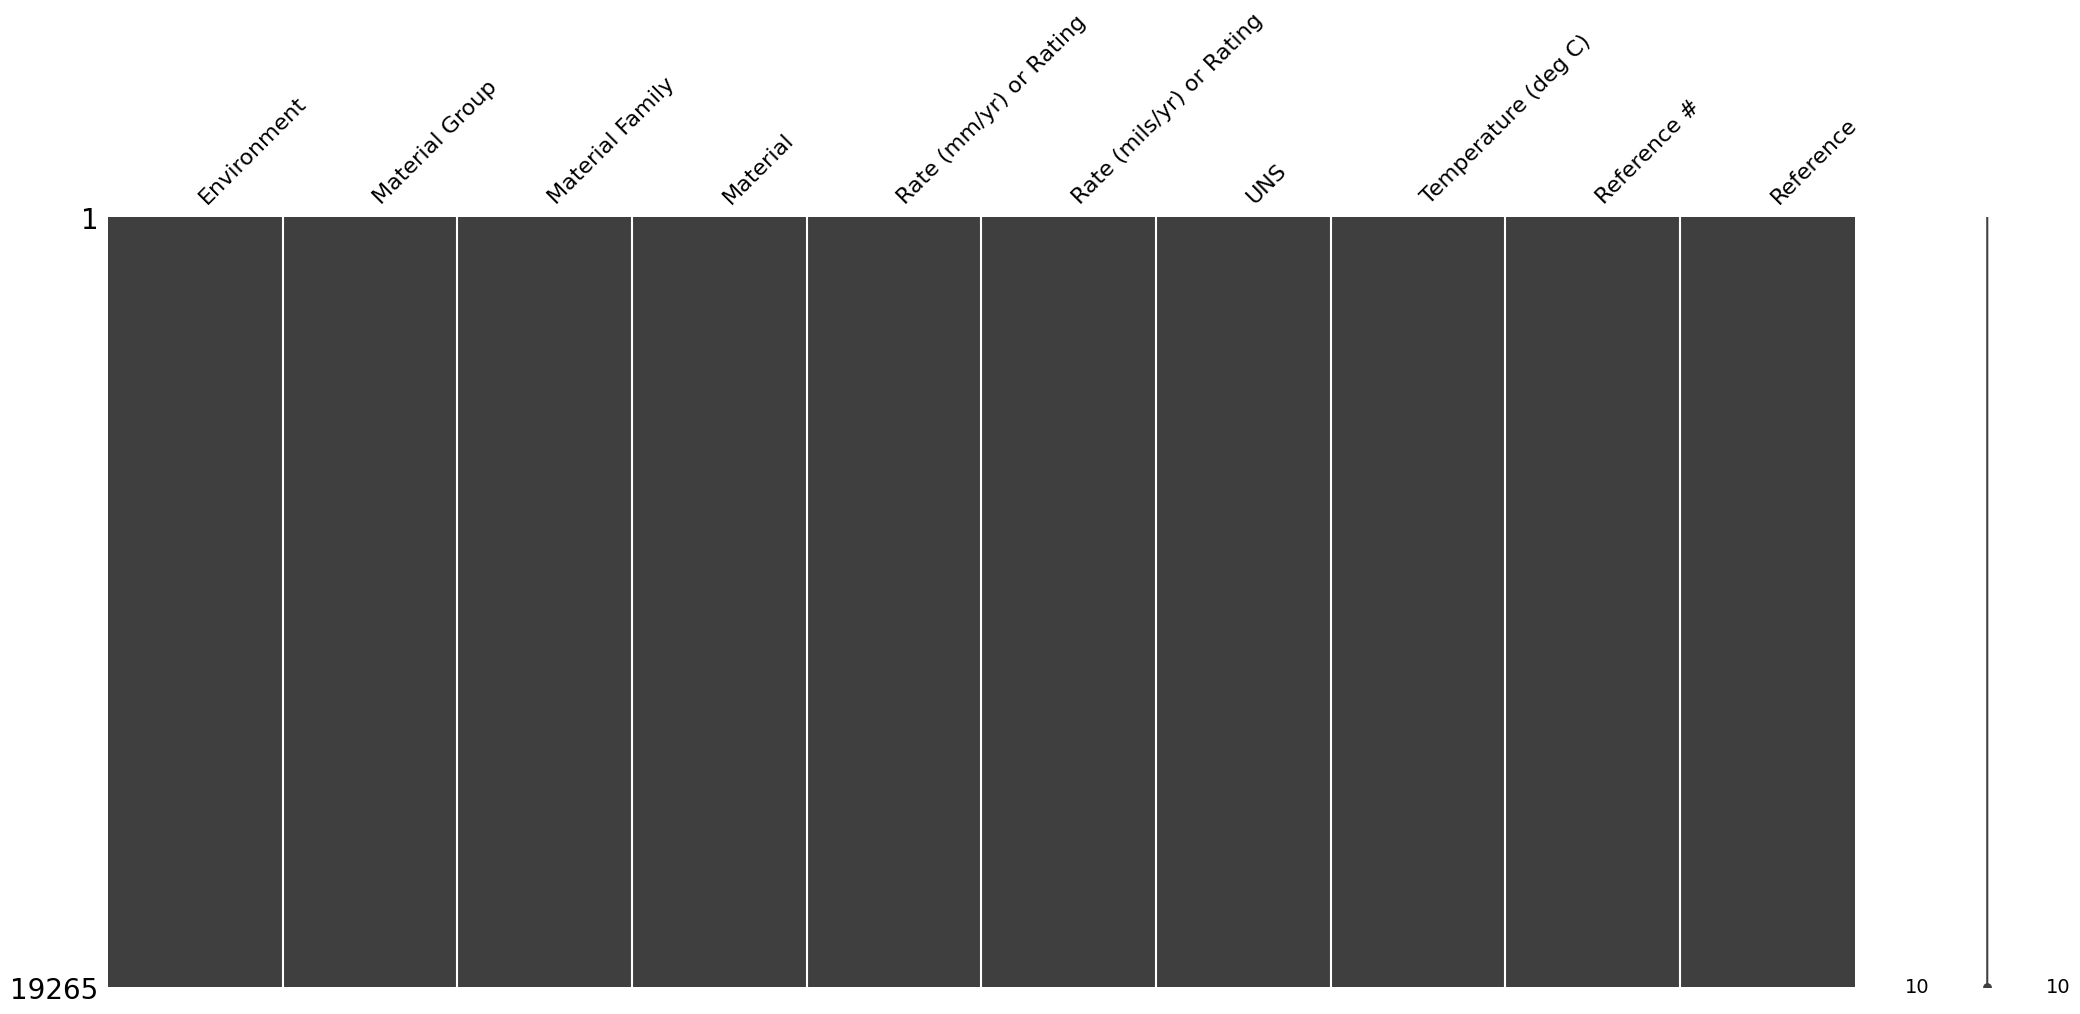

In [233]:
file.dropna(axis=0, inplace=True)
msn.matrix(file)

In [234]:
interest = ["Environment", "Material Family", "Material", "Rate (mm/yr) or Rating", "UNS", "Temperature (deg C)"]

file = file[interest]

In [235]:
len(set(file["Environment"]))

274

In [236]:
material = dict()
for element, uns in zip(file["Material"], file["UNS"]):
    
    material[element] = uns
data.drop(["Unnamed: 0"], axis=1, inplace=True)


In [237]:
uns = [None for i in range(data.shape[0])]


In [238]:

for index, mat in enumerate(data["Material"]):
    if mat in material.keys():
        uns[index] = material[mat]


In [239]:
uns = pd.Series(uns, name="UNS")

data = pd.concat([data, uns], axis=1)
data.dropna(axis=0 , inplace=True)


In [240]:
data = data.reset_index().drop(["index"], axis=1)
data.head()

,Environment,Material,Rate (mm/yr) or Rating,Concentration (Vol %),Temperature (deg C),UNS
0,Acetaldehyde,Platinum,0.05 max,Pure,200-400,P04995
1,Acetaldehyde,Silver,0.05 max,Pure,200-400,P07010
2,Acetaldehyde,Zr7O2,0.05 max,100,Boiling,R60702
3,Acetaldehyde,304,0.003,100,61,S30400
4,Acetaldehyde,316,0.1,70,118,S31600


In [241]:
keys = ['Environment' , 'UNS',  'Concentration (Vol %)', 'Temperature (deg C)', 'Rate (mm/yr) or Rating']

data = data[keys]
data.head()

,Environment,UNS,Concentration (Vol %),Temperature (deg C),Rate (mm/yr) or Rating
0,Acetaldehyde,P04995,Pure,200-400,0.05 max
1,Acetaldehyde,P07010,Pure,200-400,0.05 max
2,Acetaldehyde,R60702,100,Boiling,0.05 max
3,Acetaldehyde,S30400,100,61,0.003
4,Acetaldehyde,S31600,70,118,0.1


In [242]:
set(file["Material Family"])

{'99.0 % min Al',
 '99.0% min Al',
 'Alloy Steel',
 'Alloy steel',
 'Aluminum bronze',
 'Aluminum-copper',
 'Aluminum-magnesium',
 'Aluminum-zinc',
 'Austenitc',
 'Austenitic',
 'Austenitic ',
 'Austenitic cast iron',
 'Austenitic ductile cast iron',
 'Brass',
 'Carbon steel',
 'Cast steel',
 'Cobalt and alloys',
 'Copper',
 'Copper-nickel',
 'Ductile cast iron',
 'Duplex',
 'Ferritic',
 'Gray cast iron',
 'Lead and alloys',
 'Lead and alloys ',
 'Lead and aloys',
 'Magnesium and alloys',
 'Martensitic',
 'Nickel',
 'Nickel-chromium',
 'Nickel-chromium- molybdenum- tungsten',
 'Nickel-chromium-iron',
 'Nickel-chromium-iron-molybdenum',
 'Nickel-chromium-molybdenum',
 'Nickel-chromium-molybdenum-(tungsten)',
 'Nickel-chromium-molybdenum-cobalt',
 'Nickel-chromium-molybdenum-tungsten',
 'Nickel-copper',
 'Nickel-molybdenum',
 'Nickel-silver',
 'Niobium and alloys',
 'Niobium and alooys',
 'Noble metals',
 'Other Al alloys',
 'Phosphor bronze',
 'Precipitation hardening',
 'Prepcipitation